In [8]:
import cv2

# source = cv2.VideoCapture(0)
source = cv2.VideoCapture("http://192.168.88.247:4747/video")

winName = "camera"
cv2.namedWindow(winName, cv2.WINDOW_NORMAL)

while cv2.waitKey(1) != 27:
    hasFrame, frame = source.read()
    if not hasFrame:
        break
    
    cv2.imshow(winName, frame)

source.release()
cv2.destroyAllWindows()

In [1]:
import cv2
import os

# source = cv2.VideoCapture(0)
source = cv2.VideoCapture("http://192.168.88.247:4747/video")

winName = "camera"
cv2.namedWindow(winName, cv2.WINDOW_NORMAL)

prototxt = os.path.join("resources", "cv4", "deploy.prototxt")
model = os.path.join("resources", "cv4", "res10_300x300_ssd_iter_140000_fp16.caffemodel")

net = cv2.dnn.readNetFromCaffe(prototxt, model)

# model parameters
inWidth = 300
inHeight = 300
mean = [104, 117, 123]
confThreshold = 0.7

while cv2.waitKey(1) != 27:
    hasFrame, frame = source.read()
    if not hasFrame:
        break
        
    frame = cv2.flip(frame, 1)
    frameHeight = frame.shape[0]
    frameWidth = frame.shape[1]
    
    blob = cv2.dnn.blobFromImage(frame, 1.0, (inWidth, inHeight), mean, swapRB=False, crop=False)
    
    net.setInput(blob)
    detections = net.forward()
    
    for i in range(detections.shape[2]):
        confidence = detections[0, 0, i, 2]
        if confidence > confThreshold:
            xTopLeft = int(detections[0, 0, i, 3] * frameWidth)
            yTopLeft = int(detections[0, 0, i, 4] * frameHeight)
            xBottomRight = int(detections[0, 0, i, 5] * frameWidth)
            yBottomRight = int(detections[0, 0, i, 6] * frameHeight)
            
            cv2.rectangle(frame, (xTopLeft, yTopLeft), (xBottomRight, yBottomRight), (0, 255, 0), 4)
    
    cv2.imshow(winName, frame)

source.release()
cv2.destroyAllWindows()

In [2]:
import csv
import os

classMap = {}

with open(os.path.join("resources", "cv4", "classes.csv"), "r", newline='') as file:
    reader = csv.DictReader(file)
    for row in reader:
        classMap[row["Class ID"]] = row["Class Name"]

ice bear, polar bear, Ursus Maritimus, Thalarctos maritimus : 0.9739127


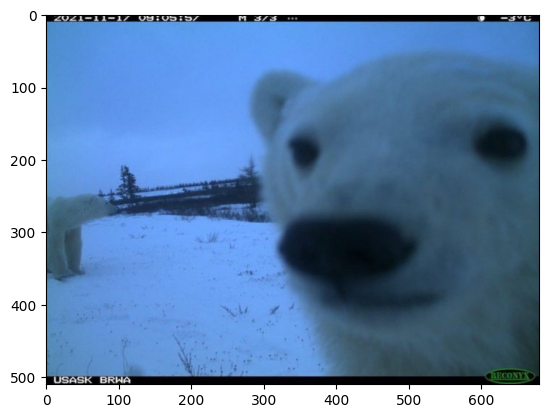

In [4]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np

path = os.path.join('resources', 'now_what.jpg')

img = cv2.imread(path)

prototxt = os.path.join("resources", "cv4", "deploy2.prototxt")
model = os.path.join("resources", "cv4", "bvlc_googlenet.caffemodel")

net = cv2.dnn.readNetFromCaffe(prototxt, model)

# model parameters
inWidth = 224
inHeight = 224
mean = [104, 117, 123]
confThreshold = 0.7

blob = cv2.dnn.blobFromImage(img, 1.0, (inWidth, inHeight), mean, swapRB=False, crop=False)

net.setInput(blob)
detections = net.forward()

maxValue = np.max(detections)
index = np.argwhere(detections == maxValue)[0][1]
print(classMap[str(index)], ":", maxValue)

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))